<a href="https://colab.research.google.com/github/pat-ch0/DataScience-intro/blob/main/Functional_API_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the MNIST data

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


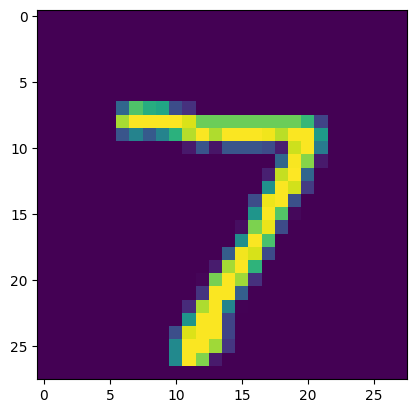

In [ ]:
plt.imshow(test_images[0])

# Preparing the data

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

*  `train_images.reshape((60000, 28 * 28))` redimensionne le tableau `train_images`. Les images MNIST sont à l'origine de 28x28 pixels. Cette ligne aplatit chaque image en un vecteur à 784 dimensions (28 * 28 = 784). Le 60000 représente le nombre d'images d'entraînement.
*  `train_images.astype('float32') / 255` convertit le type de données de `train_images` en `float32` et met à l'échelle les valeurs des pixels sur une plage comprise entre 0 et 1. Les valeurs des pixels dans les images varient généralement de 0 à 255. La division par 255 normalise les données, ce qui peut améliorer les performances du réseau de neurones.

# Defining the network

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*  `network = models.Sequential()` : Crée un modèle `Sequential`. Ce type de modèle est un empilement linéaire de couches, ce qui signifie que les données traversent chaque couche de manière séquentielle. C'est une façon simple et courante de construire des réseaux neuronaux, en particulier pour des tâches comme la classification d'images.
*  `network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))` ajoute la première couche au modèle.
*  `network.add(layers.Dense(10, activation='softmax'))` ajoute la dernière couche, qui est la couche de sortie du réseau.
  *  `10` : Cette couche a 10 neurones, correspondant aux 10 classes de chiffres possibles (0-9) dans le jeu de données MNIST.
  *  `activation='softmax'` : La fonction d'activation est **softmax**. Softmax est couramment utilisé dans la couche de sortie pour les **problèmes de classification multiclasse**. Il convertit la sortie brute des neurones en probabilités, où chaque probabilité représente la probabilité que l'entrée appartienne à une classe particulière. La classe avec la probabilité la plus élevée est la prédiction du modèle.

Ce code définit un réseau neuronal simple avec deux couches : une couche cachée avec 512 neurones et une activation ReLU, suivie d'une couche de sortie avec 10 neurones et une activation softmax. Cette structure est adaptée à la classification des chiffres manuscrits MNIST.

## The functional API: Defining the network

### Chargement de Keras et définition de la couche d'entrée

In [ ]:
from tensorflow import keras

# specify the shape of each data sample: 784-dimensional vectors
inputs = keras.Input(shape=(784,), name='img')
# the batch size is always omitted: inputs = keras.Input(shape=(784,))

*  `keras.Input` : Cette fonction crée le nœud d'entrée.
*  `shape=(784,)` : Cet argument définit la forme des données que le modèle attendra. `(784,)` signifie que chaque échantillon de données d'entrée sera un vecteur à 784 dimensions. Dans le contexte de MNIST, cela représente une image de 28x28 pixels aplatie (28 * 28 = 784).
`name='img'` : Il s'agit d'un argument optionnel qui donne un nom au nœud d'entrée, ce qui facilite la compréhension de la structure de votre modèle.

Lors de la définition de la forme d'entrée, vous spécifiez uniquement les dimensions d'un seul échantillon de données. La taille du lot (le nombre d'échantillons traités à la fois pendant l'entraînement) est gérée automatiquement par Keras et n'est pas incluse dans la forme d'entrée.

### Création d'une couche Dense

In [ ]:
# calling a layer on this inputs object
from tensorflow.keras import layers

# drawing an arrow from "inputs" to this layer we created
dense = layers.Dense(64, activation='relu')
# "passing" the inputs to the dense layer, and out we get x
x = dense(inputs)

1. `from tensorflow.keras import layers` importe le module `layers` de `tensorflow.keras`. Ce module fournit divers blocs de construction pour la construction de réseaux de neurones, y compris la couche `Dense`.
2. `dense = layers.Dense(64, activation='relu')` crée une couche Dense et l'affecte à la variable `dense`.
*  Une couche **Dense** est un type de couche où chaque neurone est connecté à chaque neurone de la couche précédente. Elle est également appelée couche entièrement connectée.
*  `64` spécifie le nombre de neurones (également appelés unités) dans cette couche.
*  `activation='relu'` définit la fonction d'activation de cette couche sur **ReLU** (Rectified Linear Unit). Les fonctions d'activation introduisent une non-linéarité dans le réseau, ce qui est crucial pour apprendre des modèles complexes. ReLU est une fonction d'activation populaire.
*  `x = dense(inputs)` connecte la couche dense que nous venons de créer aux inputs du modèle (définis précédemment comme `keras.Input`).
Imaginez que vous dessinez une flèche du nœud `inputs` vers la couche `dense` dans la structure du réseau.
La sortie de cette couche `dense` est affectée à la variable `x`. Ce `x` représente maintenant les données d'entrée transformées après avoir traversé la couche dense.

### add a few more layers to the graph of layers

In [ ]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

1. Une couche cachée avec 64 neurones et une activation ReLU.

  * `layers.Dense(64, activation='relu')` : Cela crée une nouvelle couche Dense.

    *  `64` : Il s'agit du nombre de neurones (ou unités) dans cette couche.
    *  `activation='relu'` : Cela spécifie que la fonction d'activation de la couche est ReLU (Rectified Linear Unit). ReLU introduit une non-linéarité dans le réseau, ce qui est crucial pour apprendre des modèles complexes.
  *  `(x)` : Cette partie est l'endroit où l'API fonctionnelle entre en jeu. Elle connecte essentiellement la sortie précédemment définie (`x`) à cette nouvelle couche Dense en tant qu'entrée. Imaginez que vous dessiniez une flèche de la sortie de la couche précédente vers l'entrée de cette nouvelle couche.

  *  `x = ...` : La sortie de cette nouvelle couche Dense est réaffectée à la variable `x`. Cela signifie que `x` contient désormais les données transformées après avoir traversé cette couche.

2. Une couche de sortie avec 10 neurones et une activation softmax.

  *  layers.Dense(10, activation='softmax') :

    *  `10` : Cette couche a 10 neurones, ce qui est typique pour une tâche de classification avec 10 classes (comme les chiffres de 0 à 9 dans le jeu de données MNIST).
    *  `activation='softmax'` : La fonction d'activation est softmax. Softmax est souvent utilisée dans la couche de sortie des modèles de classification multiclasse. Elle convertit la sortie brute des neurones en probabilités, où chaque probabilité représente la probabilité que l'entrée appartienne à une classe spécifique.
  *  `(x)` : Cela connecte la sortie de la couche précédente (stockée dans x) à cette nouvelle couche Dense.

  *  `outputs = ...` : La sortie de cette couche Dense finale est affectée à la variable outputs. Cela représente les prédictions finales du modèle.

La sortie de la première couche est fournie en entrée à la deuxième couche. La sortie de la deuxième couche (stockée dans outputs) représente les prédictions finales du modèle. Cette structure est typique d'un réseau de neurones simple utilisé pour classer des images comme celles du jeu de données MNIST.

### create a Model by specifying its inputs and outputs in the graph of layers

In [ ]:
# model = keras.Model(inputs=inputs, outputs=outputs)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

Cette ligne de code assemble toutes les couches que l'on a définies précédemment en un modèle Keras complet, prêt à être entraîné. Elle indique au modèle où les données entrent, comment elles sont transformées à travers les différentes couches et où la sortie finale est produite.

Pensez à ce code comme la création du plan d'architecture final de votre réseau de neurones, reliant l'entrée à la sortie en passant par toutes les étapes intermédiaires.

### full model definition process

In [ ]:
"""
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')
"""

"\ninputs = keras.Input(shape=(784,), name='img')\nx = layers.Dense(64, activation='relu')(inputs)\nx = layers.Dense(64, activation='relu')(x)\noutput = layers.Dense(10, activation='softmax')(x)\n\nmodel = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')\n"

### plot the model as a graph

### display the input and output shapes of each layer

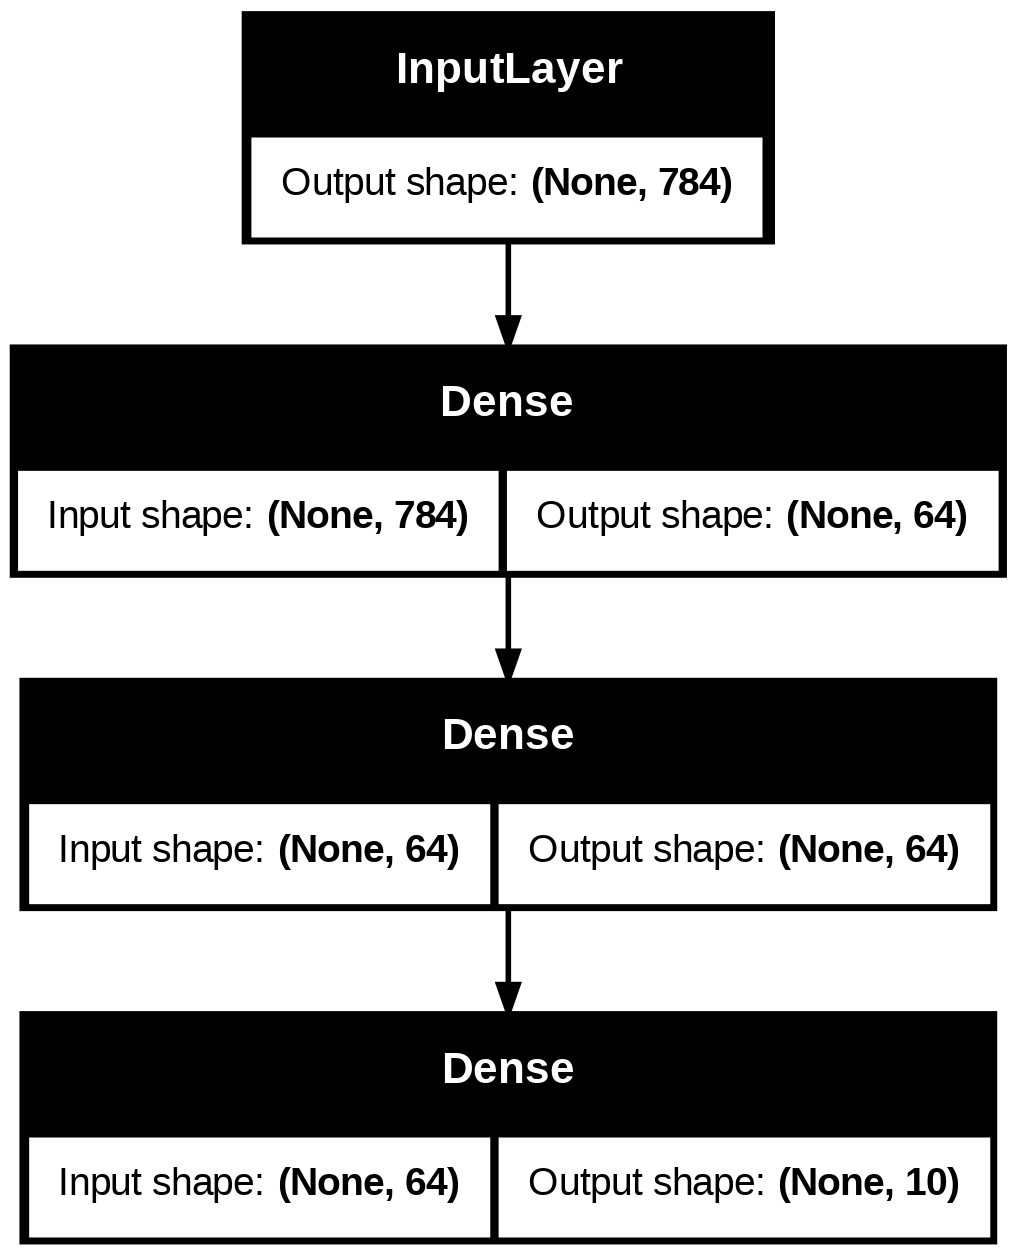

In [ ]:
keras.utils.plot_model(model, 'my_fist_model_with_shape_info.png', \
                       show_shapes=True)

# Defining the optimizer and the loss

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', \
                metrics=['accuracy'])

*  Les optimiseurs déterminent comment le réseau met à jour ses poids et ses biais pendant l'entraînement pour minimiser la fonction de perte. Ils contrôlent le processus d'apprentissage, guidant le modèle vers de meilleures prédictions.
`'rmsprop'` est un algorithme d'optimisation spécifique appelé RMSprop (Root Mean Square Propagation). Il est connu pour sa capacité à adapter le taux d'apprentissage pour chaque paramètre individuellement, ce qui peut conduire à un entraînement plus rapide et plus stable.
*  `['accuracy']` spécifie que nous voulons suivre la précision du modèle, qui est le pourcentage d'exemples correctement classés.

In [ ]:
# Training the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8695 - loss: 0.4474
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9654 - loss: 0.1170
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9786 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9850 - loss: 0.0516
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9894 - loss: 0.0365


### Testing the network

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0756
test_acc: 0.9789000153541565


La fonction evaluate renvoie deux valeurs : la test_loss (perte de test) et la test_acc (précision de test). Ces valeurs sont affectées aux variables respectives du côté gauche de l'équation.
Ces deux lignes de code mesurent et rapportent les performances du réseau de neurones entraîné sur des données non vues, fournissant un indicateur crucial de sa capacité à généraliser à de nouveaux exemples.

# demo

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# 'sparse_categorical_crossentropy prend des entiers iso one-hot encoding
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8354 - loss: 0.5848 - val_accuracy: 0.9430 - val_loss: 0.1951
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9487 - loss: 0.1749 - val_accuracy: 0.9581 - val_loss: 0.1412
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9619 - loss: 0.1250 - val_accuracy: 0.9613 - val_loss: 0.1275
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9706 - loss: 0.0969 - val_accuracy: 0.9635 - val_loss: 0.1129
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9772 - loss: 0.0750 - val_accuracy: 0.9672 - val_loss: 0.1168
313/313 - 0s - 2ms/step - accuracy: 0.9690 - loss: 0.1000
Test loss: 0.0999896302819252
Test accuracy: 0.968999981880188


*  `model.compile(...)` configure le modèle pour l'entraînement.
  *  `loss='sparse_categorical_crossentropy'` : Définit la fonction de perte, utilisée pour mesurer l'erreur du modèle pendant l'entraînement. `sparse_categorical_crossentropy` est adaptée à la classification multiclasse avec des étiquettes entières (non encodées en "one-hot").
  *  `optimizer=keras.optimizers.RMSprop()` : Définit l'optimiseur, qui ajuste les paramètres du modèle pour minimiser la fonction de perte. RMSprop est un algorithme d'optimisation courant.
  *  `metrics=['accuracy']` : Définit les métriques à surveiller pendant l'entraînement et l'évaluation. Ici, on utilise la précision (`accuracy`) pour évaluer la performance du modèle.

# Saving and serialization

In [ ]:
model.save('path_to_my_model.h5')

# Recreate the exact same model purely from the file
model = keras.models.load_model('path_to_my_model.h5')

*  `model.save()` est utilisée pour sauvegarder le modèle Keras.
*  `'path_to_my_model.h5'` est le chemin où le modèle sera sauvegardé. Le `.h5` indique que le modèle sera sauvegardé dans un format de fichier HDF5 (à ne pas confondre avec le système de fichiers distribué HDFS :) . HDF5 est un format de fichier standard pour stocker de grandes quantités de données numériques, souvent utilisé en science des données et en apprentissage automatique.
En exécutant cette ligne, votre modèle, incluant son architecture, ses poids et son optimiseur, est sauvegardé dans le fichier 'path_to_my_model.h5'.

`keras.models.load_model()` est utilisée pour charger un modèle Keras précédemment sauvegardé.
`'path_to_my_model.h5'` est le chemin du fichier contenant le modèle sauvegardé.
Cette ligne charge le modèle qui a été sauvegardé précédemment dans la variable model. Vous pouvez maintenant réutiliser ce modèle sans avoir à le re-entraîner.

# end-to-end autoencoder model for training

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)

*  `encoder_input = keras.Input(...)` crée une couche d'entrée pour le modèle, qui sera utilisée pour alimenter les données d'entrée. On l'appelle `encoder_input` car elle est destinée à être l'entrée d'un encodeur (dans le contexte d'un auto-encodeur).
*  `shape=(28, 28, 1)` spécifie la forme des données d'entrée attendues par le modèle. Dans ce cas, il s'agit d'images de 28x28 pixels avec un seul canal (noir et blanc). Pour des images en couleur, il y aurait 3 canaux (rouge, vert, bleu).
*  `name='img'` donne un nom à la couche d'entrée, ce qui peut être utile pour la clarté et le débogage.
*  `x = layers.Conv2D(...)`: Cette ligne crée une couche de convolution 2D (Conv2D) et l'applique à l'entrée `encoder_input`. Le résultat est stocké dans la variable x.
*  `16`: Ceci spécifie le nombre de filtres (ou noyaux) dans la couche de convolution. Chaque filtre apprend à détecter des caractéristiques spécifiques dans l'image d'entrée.
*  `3`: Ceci spécifie la taille du noyau de convolution, qui est une matrice 3x3 dans ce cas. La taille du noyau détermine la zone de l'image d'entrée sur laquelle le filtre est appliqué à la fois.
*  `x = layers.MaxPooling2D(...)` crée une couche de "max pooling" et l'applique à la sortie de la couche précédente. Le "max pooling" réduit la taille des données en ne conservant que la valeur maximale dans une région donnée. Cela permet de réduire la complexité du modèle et de le rendre plus robuste aux variations mineures dans les données d'entrée.

## predicting the class of an exemple

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[2.7125376e-08 5.5586762e-09 1.4498020e-05 6.5813103e-05 5.0705490e-12
  4.0885490e-07 2.0257435e-11 9.9991810e-01 2.2582127e-07 9.0756015e-07]]


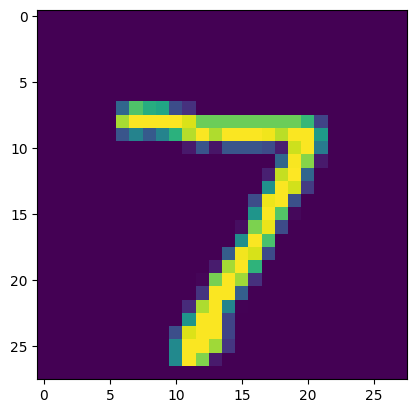

In [ ]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [0])
# img = test_images [0].reshape ((1, 28 * 28))
# il faut aussi faire la division par 255 si on prend les exemples de base
test_images = test_images.astype('float32') / 255
img = test_images[0].reshape((1, 28 * 28))
print(network.predict(img))

*  `astype('float32')` convertit le type de données des images en nombres à virgule flottante 32 bits.

## Questions

**Question: Décrivez le jeu de données MNIST et son utilisation dans ce notebook.**

MNIST est une base de données d'images de chiffres manuscrits, largement utilisée pour l'entraînement et le test de modèles de Machine Learning, notamment en reconnaissance d'images. Dans ce notebook, MNIST sert à entraîner un réseau de neurones à classifier des images de chiffres (0 à 9).

**Question: Expliquez le rôle des fonctions d'activation ReLU et softmax dans un réseau de neurones.**

ReLU (Rectified Linear Unit): Introduit une non-linéarité, essentielle pour apprendre des modèles complexes. Elle remplace les valeurs négatives par 0 et garde les valeurs positives inchangées. Utilisée dans les couches cachées.

Softmax: Utilisée dans la couche de sortie pour la classification multiclasse. Convertit les sorties brutes en probabilités, indiquant la probabilité d'appartenance à chaque classe.

**Question: Quelle est la différence entre une couche Dense et une couche Conv2D ? Dans quels cas utiliseriez-vous chacune d'elles ?**

Dense: Chaque neurone est connecté à tous les neurones de la couche précédente (couche entièrement connectée). Adaptée pour traiter des données vectorielles, comme les images aplaties.

Conv2D: Utilise des filtres pour extraire des caractéristiques spatiales des données d'entrée. Adaptée pour traiter des images, car elle préserve les relations spatiales entre les pixels.

**Question: Pourquoi est-il important de normaliser les données d'entrée avant de les utiliser pour entraîner un réseau de neurones ? Comment est-ce fait dans ce notebook ?**

La normalisation permet d'éviter que certaines caractéristiques dominent l'apprentissage en raison de leurs valeurs plus élevées. Elle accélère l'entraînement et améliore les performances. Dans ce notebook, la normalisation est effectuée en divisant les valeurs des pixels par 255, les ramenant ainsi dans la plage [0, 1].

**Question: Décrivez les étapes principales pour entraîner un réseau de neurones avec Keras.**

1. Définir le modèle: Choisir l'architecture du réseau (couches, fonctions d'activation...).
2. Compiler le modèle: Spécifier la fonction de perte, l'optimiseur et les métriques.
3. Entraîner le modèle: Utiliser la méthode *fit* pour alimenter le modèle avec les données d'entraînement et ajuster ses poids.
4. Évaluer le modèle: Utiliser la méthode *evaluate* pour mesurer les performances du modèle sur des données de test.

**Question: Expliquez la structure du réseau de neurones défini dans le notebook (nombre de couches, types de couches, etc.).**

Le réseau a deux couches Dense : une couche cachée avec 512 neurones et activation ReLU, et une couche de sortie avec 10 neurones et activation softmax.

**Question: Comment la fonction de perte et l'optimiseur sont-ils choisis pour ce modèle ? Quel est leur impact sur l'entraînement ?**

 Les performances sont évaluées avec la méthode *evaluate*. `test_loss` représente la perte du modèle sur les données de test, tandis que `test_acc` représente la précision (proportion de prédictions correctes) sur les données de test.

 Le choix de la fonction de perte dépend principalement du type de tâche d'apprentissage automatique que l'on souhaite accomplir (classification, régression, détection d'objets...). L'optimiseur est responsable de la mise à jour des paramètres du modèle pour minimiser la fonction de perte.

 Une fonction de perte bien choisie guide le modèle vers une meilleure précision en minimisant l'écart entre les prédictions et les valeurs réelles. Un optimiseur approprié assure que ce processus se déroule efficacement et rapidement.  La combinaison d'une bonne fonction de perte et d'un optimiseur approprié aide le modèle à mieux généraliser aux données non vues, en évitant le surajustement ou le sous-ajustement.

**Question: Comment pouvez-vous sauvegarder et recharger un modèle Keras entraîné ?**

Sauvegarder: Utiliser la méthode `model.save('nom_du_fichier.h5')`.

Recharger: Utiliser `keras.models.load_model('nom_du_fichier.h5')`.

**Question: Quels sont les avantages d'utiliser l'API fonctionnelle de Keras pour définir un modèle ?**

L'API fonctionnelle permet de créer des modèles plus flexibles et complexes, avec des architectures non linéaires (branchements, fusions...).

**Question: Expliquez comment créer un modèle simple avec l'API fonctionnelle, en utilisant des couches Dense.**

```py
inputs = keras.Input(shape=(taille_entree,))
x = layers.Dense(nb_neurones, activation='relu')(inputs)
outputs = layers.Dense(nb_classes, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
```



**Question: Comment visualiser la structure d'un modèle créé avec l'API fonctionnelle ?**

Utiliser `keras.utils.plot_model(model, show_shapes=True)`.

**Question: Comment pourriez-vous adapter ce modèle pour une autre tâche de classification d'images ?**

Modifier la couche d'entrée pour correspondre à la taille des nouvelles images, ajuster le nombre de neurones dans la couche de sortie pour correspondre au nombre de classes, et réentraîner le modèle avec les nouvelles données.